In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly
import plotly.express as px

In [71]:
churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop(columns='RowNumber')


In [72]:
plt.style.use('default')

# Task 9.1

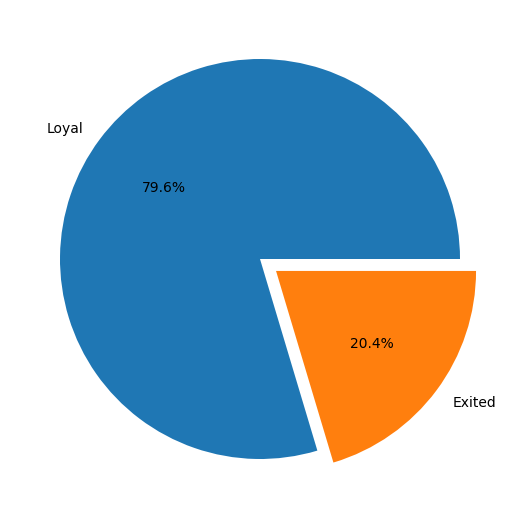

In [73]:
churn_data['Loyality'] = churn_data['Exited'].apply(lambda x: 'Exited' if x == 1 else 'Loyal')
loyality = churn_data['Loyality'].value_counts()

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    loyality,
    labels=loyality.index,
    autopct='%.1f%%',
    explode = [0, 0.1]
);

Каждый пятый клиент покидает банк

# Task 9.2

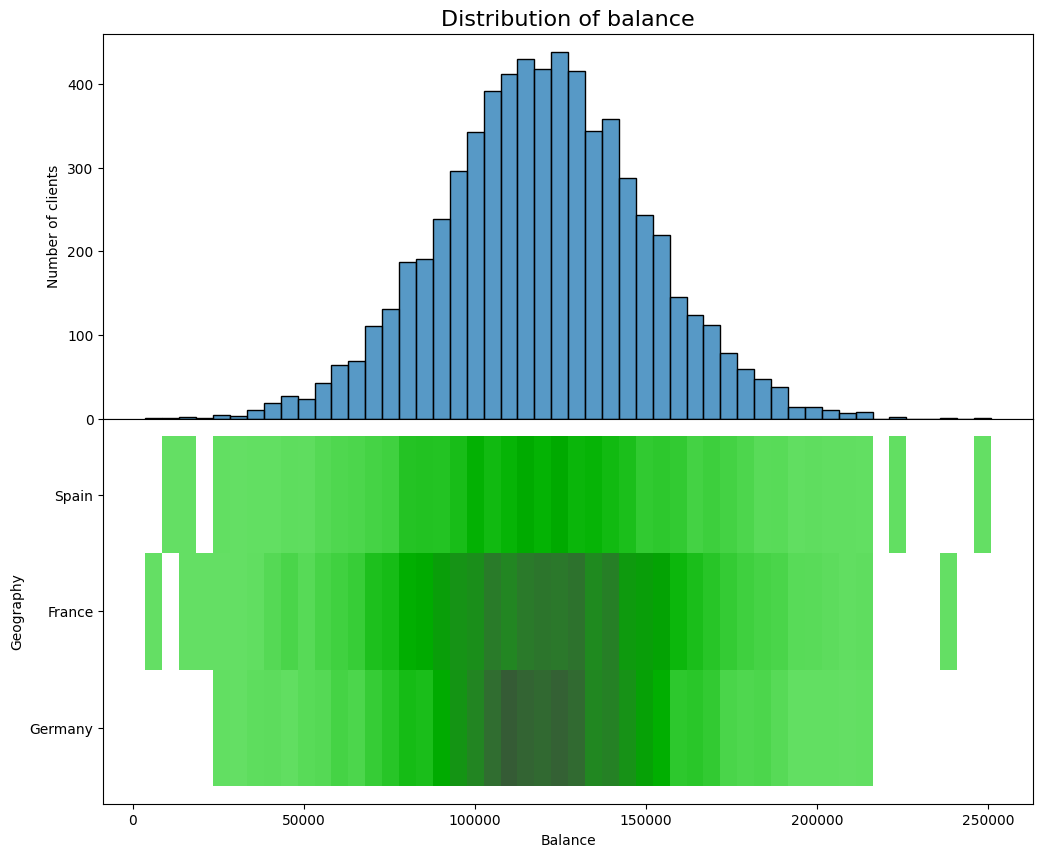

In [74]:
#limit the Balance from below to 2500
croped_churn_data = churn_data[churn_data['Balance'] > 2500]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
plt.subplots_adjust(hspace=.0)

#histogram of balance (total)
histplot1 = sns.histplot(
    data=croped_churn_data, 
    x='Balance', 
    bins=50,
    ax=axes[0],
)
histplot1.set_title('Distribution of balance', fontsize=16)
histplot1.set_xlabel('Balance')
histplot1.set_ylabel('Number of clients')

#histogram of balance  (by country)
histplot2 = sns.histplot(
    data=croped_churn_data,
    x='Balance',
    y='Geography',
    bins=50,
    color='green',
    ax=axes[1]
)
histplot2.set_xlabel('Balance')
histplot2.set_ylabel('Geography')

plt.show()


Основная часть клиентов банка с балансом более 2500 держит на счетах от 100000 до 150000 (К слову, гистограмма практически полностью соответствует нормальному распрелению). При этом в Германии таких клиентов значительно больше по сравнению с Испанией. Франция по этому показателю занимает среднюю позицию

# Task 9.3

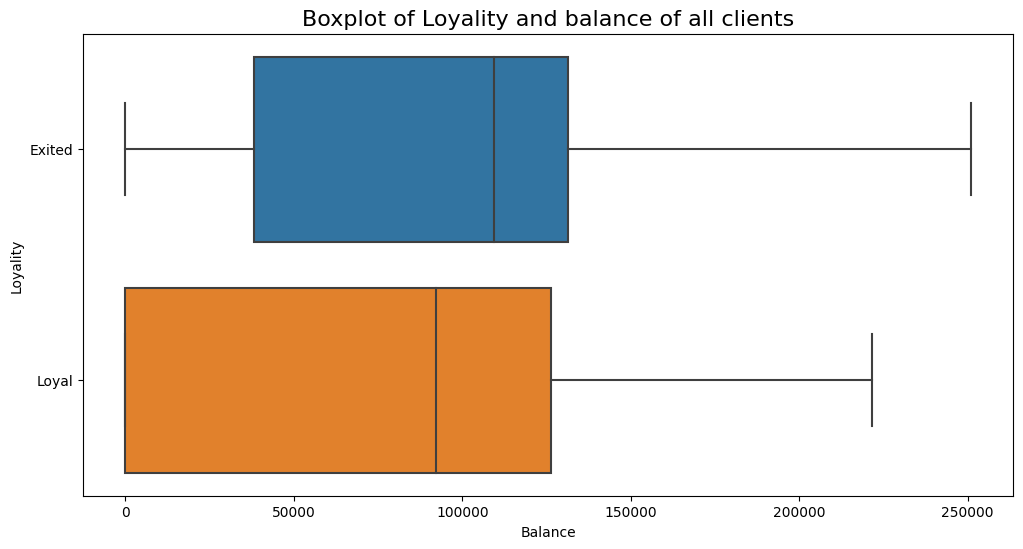

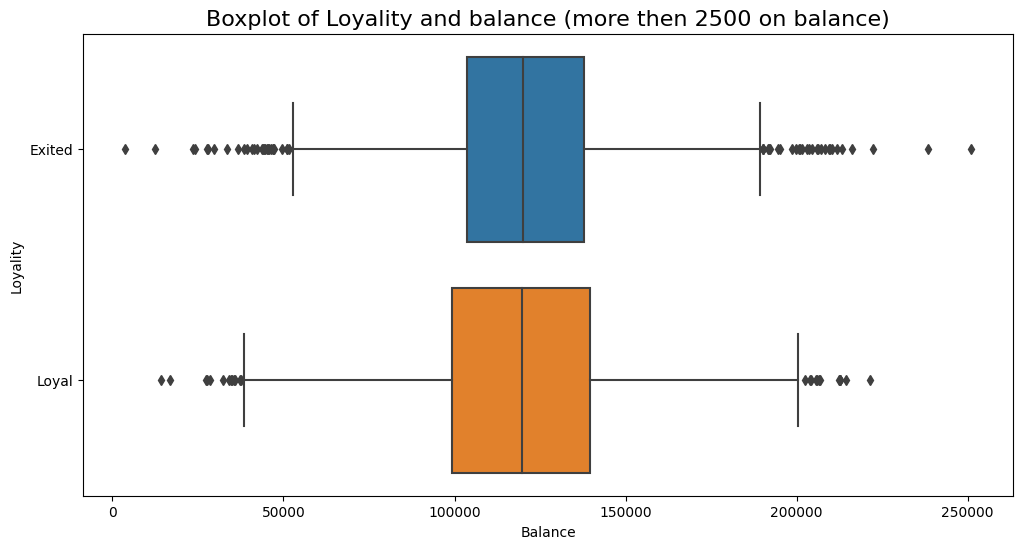

In [75]:
#Boxplot - All Clients
fig = plt.figure(figsize=(12, 6))
boxplot1 = sns.boxplot(data=churn_data, x='Balance', y='Loyality', order=['Exited', 'Loyal'])
boxplot1.set_title('Boxplot of Loyality and balance of all clients', fontsize=16)
boxplot1.set_xlabel('Balance')
boxplot1.set_ylabel('Loyality')
plt.show()
#Boxplot - Clients with more then 2500 on balance
fig = plt.figure(figsize=(12, 6))
boxplot2 = sns.boxplot(data=croped_churn_data, x='Balance', y='Loyality', order=['Exited', 'Loyal'])
boxplot2.set_title('Boxplot of Loyality and balance (more then 2500 on balance)', fontsize=16)
boxplot2.set_xlabel('Balance')
boxplot2.set_ylabel('Loyality')
plt.show()



Для клиентов, баланс которых более 2500, медианное значение баланса ушедших и лояльных клиентов одинаково. Величина "ящика" немного меньше у ушедших клиентов, но не значительно. А вот число потенциальных выбросов у ушедших клиентов заметно больше, чем у лояльных, и этот факт требует дополнительного анализа.
Если же рассматривать всех клиентов банка, то видно, что около половины лояльных клиентов не имеют средств на балансе. И в данном исследовании эта группа клиентов нас не интересует.

# Task 9.4

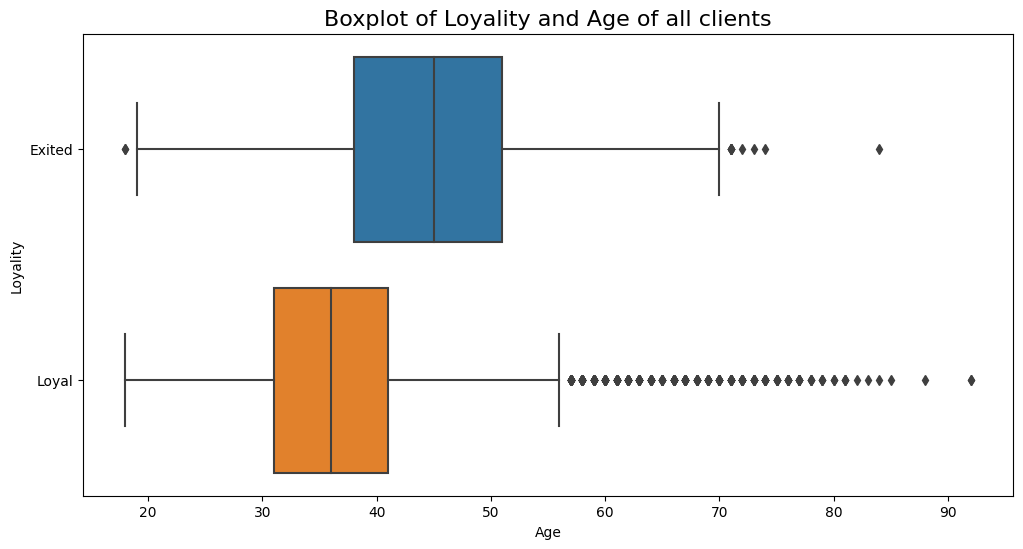

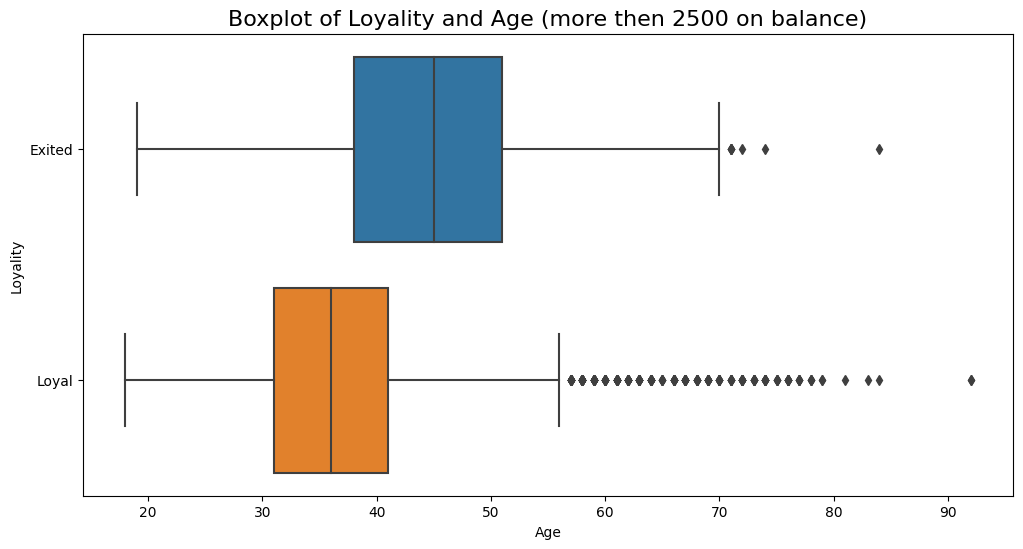

In [76]:
#Boxplot - All Clients
fig = plt.figure(figsize=(12, 6))
boxplot1 = sns.boxplot(data=churn_data, x='Age', y='Loyality', order=['Exited', 'Loyal'])
boxplot1.set_title('Boxplot of Loyality and Age of all clients', fontsize=16)
boxplot1.set_xlabel('Age')
boxplot1.set_ylabel('Loyality')
plt.show()

fig = plt.figure(figsize=(12, 6))
boxplot2 = sns.boxplot(data=croped_churn_data, x='Age', y='Loyality', order=['Exited', 'Loyal'])
boxplot2.set_title('Boxplot of Loyality and Age (more then 2500 on balance)', fontsize=16)
boxplot2.set_xlabel('Age')
boxplot2.set_ylabel('Loyality')
plt.show()


Большое количество потенциальных выбросов в группе лояльных клиентов. Судя по возрасту это могут быть либо пожилые консервативные люди, либо, возможно, уже ушедшие из жизни.
Значительная часть ушедших клиентов имеет возраст от 40 до 50 лет (при медианном значении около 45), банку необходимо обратить внимание именно на эту категорию клиентов.

# Task 9.5

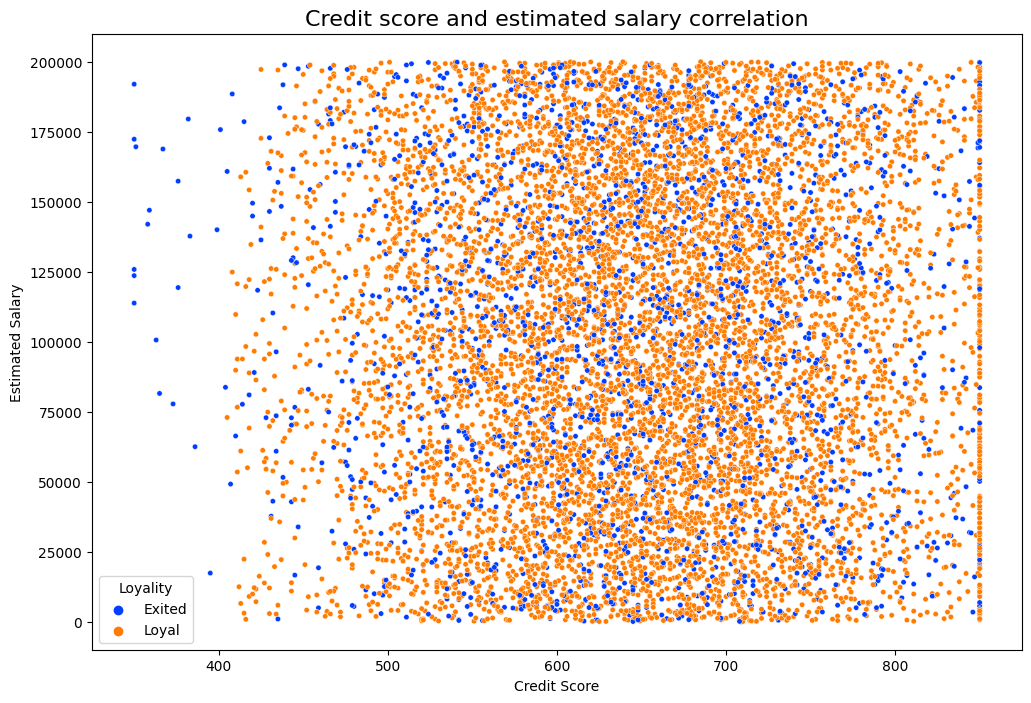

In [77]:
fig = plt.figure(figsize=(12, 8))

scatterplot = sns.scatterplot(
    data=churn_data,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Loyality',
    s=15,
    palette='bright'
)
scatterplot.set_title('Credit score and estimated salary correlation', fontsize=16)
scatterplot.set_xlabel('Credit Score')
scatterplot.set_ylabel('Estimated Salary')
plt.show()

Корреляции между кредитным рейтингом и проедполагаемой зарплатой клиентов не наблюдается. Отток клиентов с кредитным рейтиногом ниже 400 составляет 100%. Основная часть клиентов имеет рейтинг от 550 до 750.  

# Task 9.6

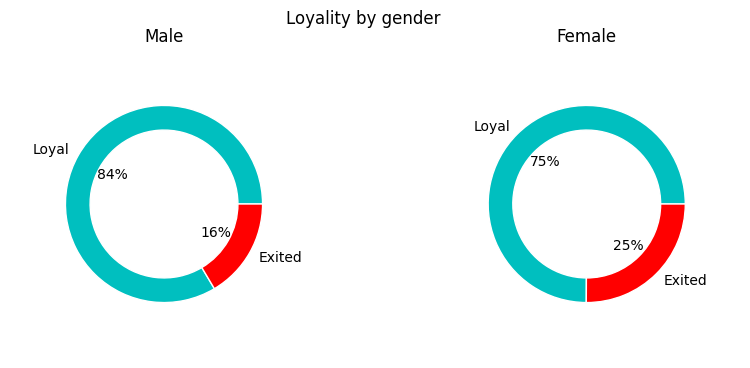

In [78]:


male_status = churn_data.loc[churn_data['Gender'] == 'Male', 'Loyality'].value_counts()
female_status = churn_data.loc[churn_data['Gender'] == 'Female', 'Loyality'].value_counts()

fig, axes =  plt.subplots(1, 2, figsize=(10, 4))
plt.suptitle('Loyality by gender')
size = 0.2
for ax, df, title in zip(axes,(male_status, female_status), ('Male', 'Female')):
    ax.pie(
        df,
        labels=df.index,
        autopct='%1.0f%%',
        colors= ['c', 'r'],
        radius=1-size,
        wedgeprops=dict(width=size, edgecolor='w')
    )
    ax.set_title(title)





Из банка уходит каждая четвертая женщина и каждый шестой мужчина

# Task 9.7

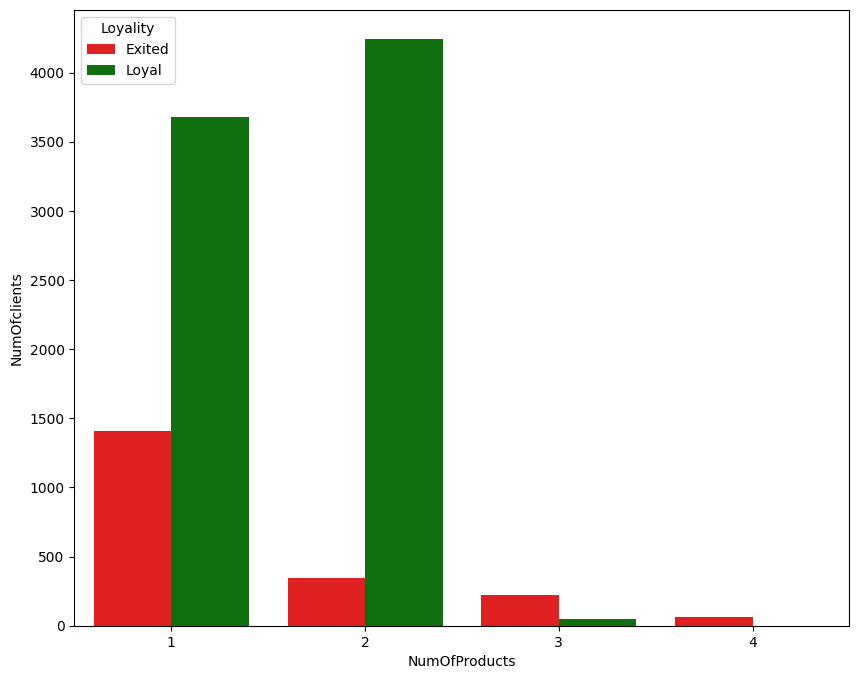

In [79]:
#Count number of  loyal and exited clients by every number of products they have
products_loyality = churn_data.groupby(['NumOfProducts','Loyality']).size().reset_index(name='NumOfclients')

fig = plt.figure(figsize=(10,8))
barplot = sns.barplot(
    products_loyality,
    x='NumOfProducts',
    y='NumOfclients',
    hue='Loyality',
    palette=['green' if x == 'Loyal' else 'red' for x in products_loyality['Loyality']]
)

Наиболее лояльные банку клиенты - пользующиеся двумя услугами банка. Основная часть лояльных клиентов пользуется одной или двумя услукгами, но в группе, пользующейся только одной услугой, около 40% склонны покидать банк. Ситуация кардинально меняется в группах с требя и четырмя услугами, там отток клиентов составляет от 75 до 100%

# Task 9.8

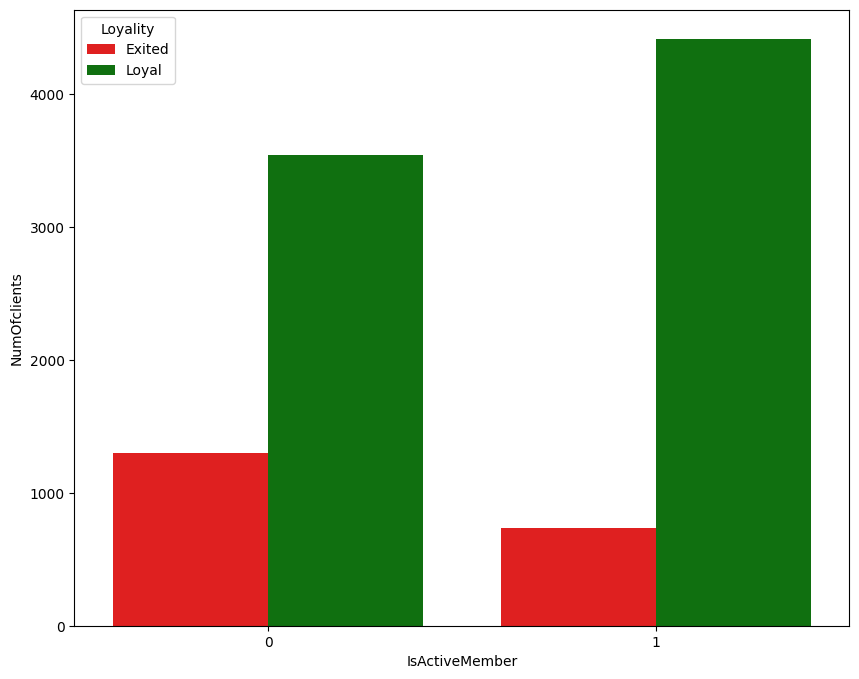

In [80]:
#Count number of  loyal and exited clients by ActiveMember status
active_loyality = churn_data.groupby(['IsActiveMember','Loyality']).size().reset_index(name='NumOfclients')
fig = plt.figure(figsize=(10,8))
barplot = sns.barplot(
    active_loyality,
    x='IsActiveMember',
    y='NumOfclients',
    hue='Loyality',
    palette=['green' if x == 'Loyal' else 'red' for x in active_loyality['Loyality']]
)

Клинеты с присвоенным статусом активного клиента более лояльны к банку. Из предоставленной информации о практическом значении статуса активного клиента, причинах его присвоения, могу только прелоржить бунку присвоить его всем неактивным клиентам.

# Task 9.9

In [81]:
#Count ratio of exited clients by geography

#Exited clients by countries
mask = churn_data['Loyality'] == 'Exited'
countries_exited = churn_data[mask].groupby(['Geography', 'Loyality']).size().reset_index(name='NumOfClients')
#Total clients by country
countries_total = churn_data.groupby(['Geography']).size().reset_index(name='NumOfClients')
#Exited-to-total ratio
countries_exited['Exited ratio'] = round(countries_exited['NumOfClients']/countries_total['NumOfClients'], 2)
display(countries_total)
#Number of clients with balance > 2500
display(croped_churn_data.groupby(['Geography']).size().reset_index(name='NumOfClients'))


fig = px.choropleth(
    countries_exited,
    locations='Geography',
    locationmode = "country names",
    color='Exited ratio',
    range_color=[0, 0.35],
    title='Exited-to-total clients ratio by countries',
    width=800, 
    height=500, 
    color_continuous_scale='Reds'
)

fig.show()

,Geography,NumOfClients
0,France,5014
1,Germany,2509
2,Spain,2477


,Geography,NumOfClients
0,France,2596
1,Germany,2509
2,Spain,1278


Доля ушедших клиентов больше в Германии. Из представленных данных видно, что в отделениях банка в Германии нет ни одного клиента с балансом меньше 2500. Во Франции и Испании доля клиентов с балансом ниже 2500 составляет практически половину (а на самом деле если поменять условия второго задания и сделать выборку по балансу больше 0, то станет понятно - половина клиентов во Франции и Испании имеют нулевые балансы). Либо данные неверны, и необходимо получить уточнения, либо именно отсутствие большого количество клиентов с нулевым балансом (а именно они состывляют достаточно большую часть лояльных клиентов) в Германии сказывается на показателе доли ушедших клиентов. 

# Task 9.10

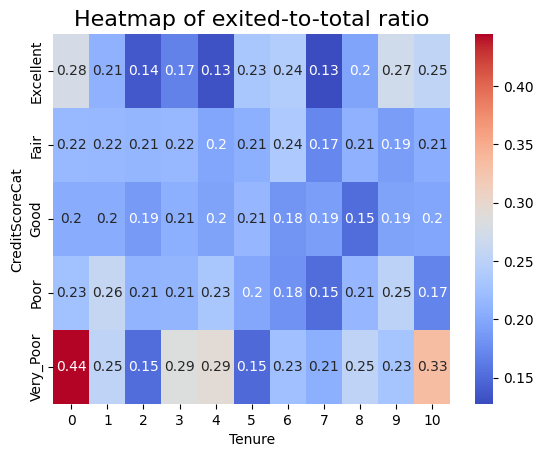

In [82]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

pivot = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat', 
    columns='Tenure',
    aggfunc='mean',
    fill_value=0
)

heatmap = sns.heatmap(data=pivot, cmap='coolwarm', annot=True)
heatmap.set_title('Heatmap of exited-to-total ratio', fontsize=16);

Чаще всего уходят клиенты категории Very_Poor недавно пришедшие в банк, либо пользующиеся услугами банка уже 10 лет